# Reading GEO processed data
### The following files were downloaded from GEO's website using a webbrowser

Returning 24 samples (mean: 0.51). Structure appears to be 3 columns per sample; raw data column pattern was 'meth_unmeth_pval'; probes in rows; and ID_REF --> IlmnID as the probe names.


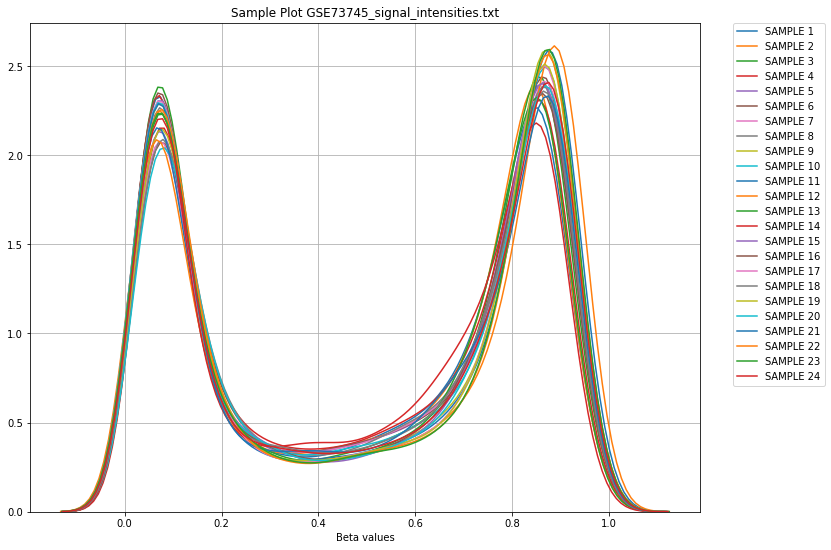

Returning 22 samples (mean: 0.51). Structure appears to be 3 columns per sample; raw data column pattern was 'meth_unmeth_pval'; probes in rows; and ID_REF --> IlmnID as the probe names.


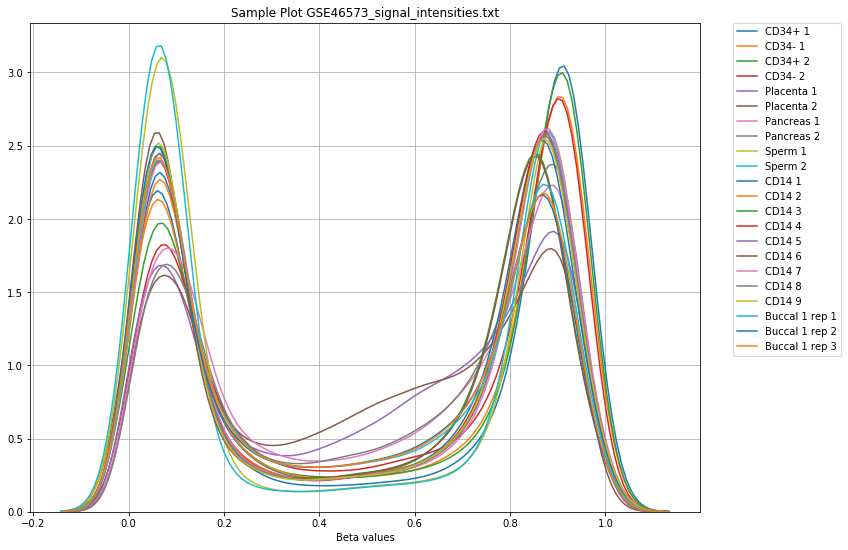

Returning 34 samples (mean: 0.52). Structure appears to be 3 columns per sample; raw data column pattern was 'meth_unmeth_pval'; probes in rows; and ID_REF --> IlmnID as the probe names.


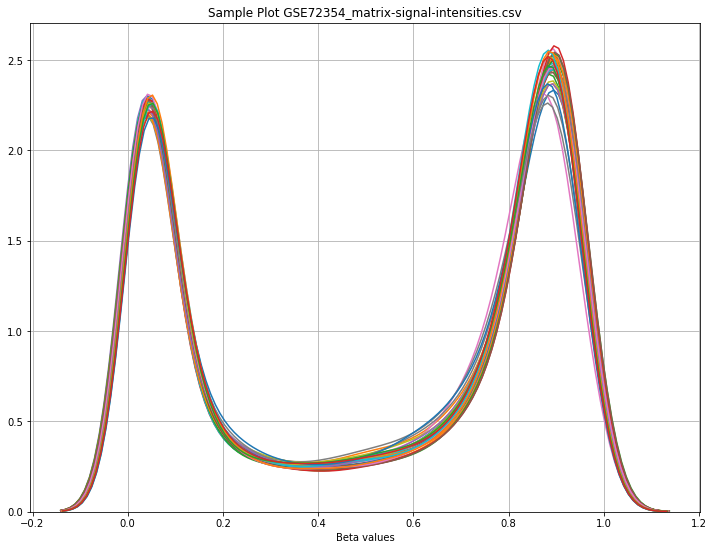

Returning 72 samples (mean: 0.45). Structure appears to be 3 columns per sample; raw data column pattern was 'meth_unmeth_pval'; probes in rows; and ID_REF --> IlmnID as the probe names.


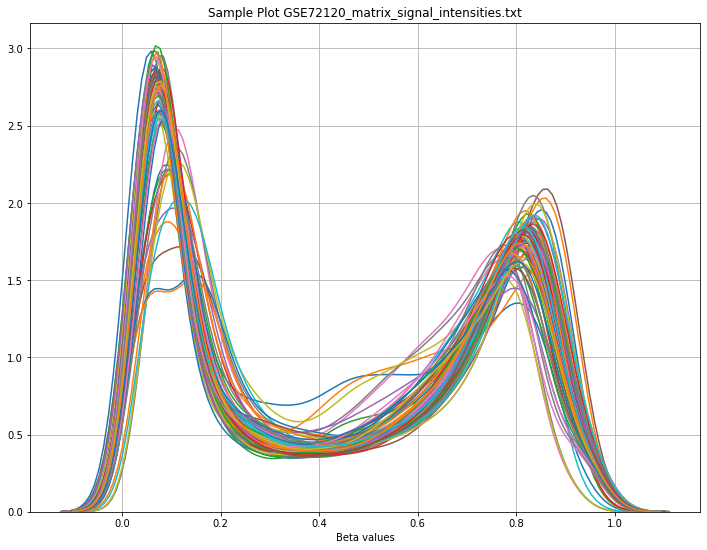

Multiline header detected with 3 rows.
Reloading raw data, excluding header.


INFO:methylcheck.samples.postprocessQC:Your data needed to be transposed (df = df.transpose()).


After ignoring multiline header: 1 old columns are now 44 new named columns.
GSE133355_processed_data_sheets.xlsx


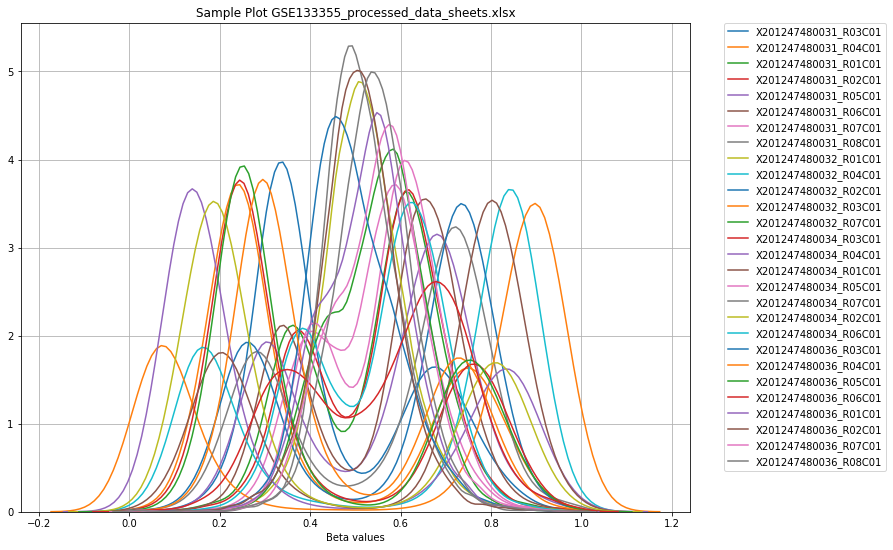

Returning 127 samples (mean: 0.51). Structure appears to be 3 columns per sample; raw data column pattern was 'meth_unmeth_pval'; probes in rows; and ID_REF --> IlmnID as the probe names.


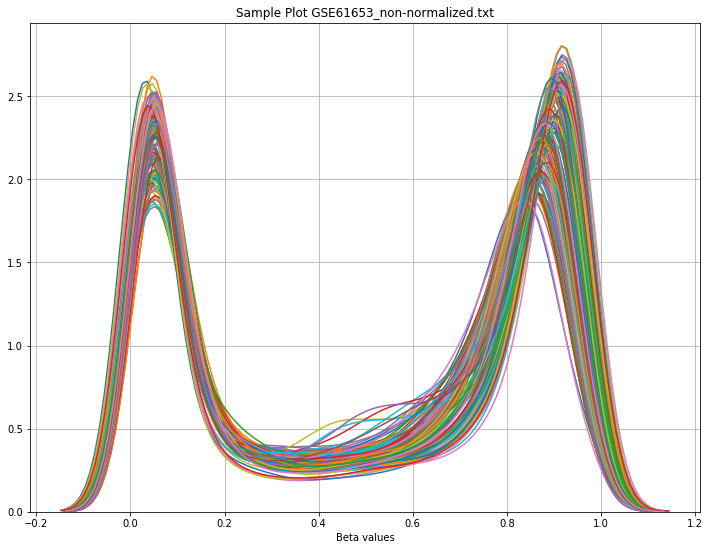

Returning raw data. Appears to contain 101 sample beta values in columns (mean: 0.61), probes in rows, and ID_REF --> IlmnID as the probe names.


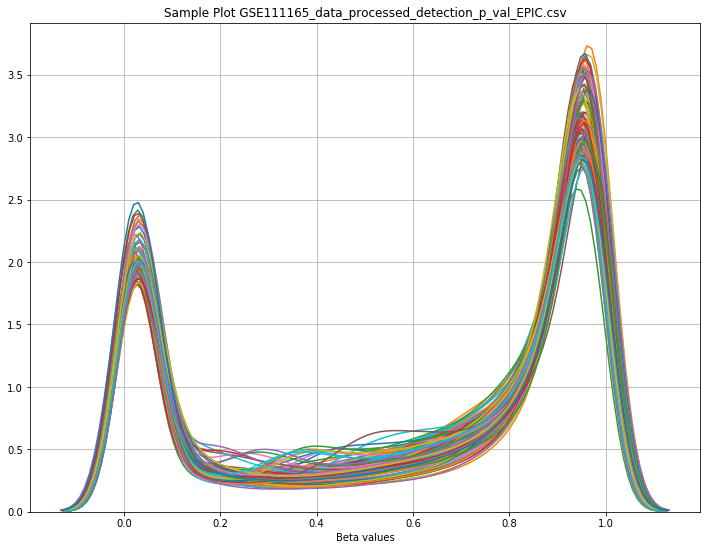

In [2]:
%matplotlib inline
import methylprep
import methylcheck
from pathlib import Path
import pandas as pd
QC = Path('/Volumes/LEGX/qc_testing/')

test_files = [
    'GSE73745_signal_intensities.txt',
    'GSE46573_signal_intensities.txt',
    'GSE72354_matrix-signal-intensities.csv',
    'GSE72120_matrix_signal_intensities.txt',
    'GSE133355_processed_data_sheets.xlsx', # --- failed
    'GSE61653_non-normalized.txt',    
    'GSE111165_data_processed_detection_p_val_EPIC.csv',
    #'GSE78975_matrix_detection_pval.csv', --- no betas here
]

for FILE in test_files:
    FILE = Path(QC,FILE)
    #test_find_calc_beta(FILE, gen_test_data=True)
    df = methylcheck.read_geo(FILE, verbose=True)
    samples = df.loc[:, df.columns.str.contains('^X2')]
    if len(samples.columns) < 3:
        #methylcheck.sample_plot(df, verbose=True, full_range=True, plot_title=f"Sample Plot {FILE.name}", reduce=None)
        methylcheck.sample_plot(df, full_range=True, plot_title=f"Sample Plot {FILE.name}")
    else:
        # GSE133355: this one file has extra non-sample meta data in columns that must be removed before sample_plot will work.
        # samples start with X2...
        print(FILE.name)
        samples = df.loc[:, df.columns.str.contains('^X2')]
        methylcheck.sample_plot(samples, verbose=True, full_range=True, plot_title=f"Sample Plot {FILE.name}", reduce=None)